# Project: Yelp Dataset
# Author: Akhilesh Somani
# University of Illinois at Urbana-Champaign

# Import basic packages

In [1]:
import json, tqdm, time, copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_palette('colorblind')
sns.set_context('talk')

# Data Preprocessing:

## WARNING: MAKE SURE TO EXTRACT THE JSON FILES IN A FOLDER NAMED 'Yelp_Dataset'. The JSON files are later deleted from the local PC to save space

## (1) Create filepaths to read data:

In [2]:
filename_prefix = 'Yelp_Dataset/yelp_academic_dataset_'
all_suffixes = ['business', 'checkin', 'review', 'tip', 'user']
filepaths = [filename_prefix + suffix + '.json' for suffix in all_suffixes]
csv_filepaths = [filename_prefix + suffix + '.csv' for suffix in all_suffixes]

## (2) Function to convert data from json to dataframes and save as csv:

In [3]:
def read_write_json_data():
    '''
    Reads json data into dataframes and writes them as csv files for later use
    '''
    
    # Read JSON files as dataframes    
    dataframes = []
    for file_num in range(len(filepaths)):
        tic = time.time()
        data = {}
        with open(filepaths[file_num] ,'r', encoding="latin-1") as file:
            for line in file:
                temp = json.loads(line)

                for key, val in temp.items():
                    if data.get(key, "not_found") == "not_found":
                        data[key] = [val]
                    else:
                        data[key].extend([val])

        dataframes.append(pd.DataFrame.from_dict(data))

        toc = time.time()
        print('Time to read {0} json file (in secs): {1}'.format(all_suffixes[file_num], (toc-tic)))
    
    print('\n')
    
    # Save dataframes as csv files
    
    ctr = 0
    for df in dataframes:
        tic = time.time()
        df.to_csv(csv_filepaths[ctr], index = False)
        toc = time.time()
        print('Time to save {0} as csv (in secs): {1}'.format(all_suffixes[ctr], (toc-tic)))
        ctr += 1
        
    return dataframes

## (3) Function to read csv data directly:

In [4]:
def read_csv_data():
    '''
    Reads csv files and saves them as dataframes
    '''
    dataframes = []
    for file in csv_filepaths:
        tic = time.time()
        temp = pd.read_csv(file)
        dataframes.append(temp)
        toc = time.time()
        print('Time to read {0} csv into a dataframe (in secs): {1}'.format(all_suffixes[csv_filepaths.index(file)],\
                                                                            (toc-tic)))
    return dataframes

# Read data as dataframes:

In [5]:
# If csv files are present, read them directly, else read the JSON files and save them as csv files
try:
    dataframes = read_csv_data()
except:
    print('No csv files found')
    dataframes = read_write_json_data()

Time to read business csv into a dataframe (in secs): 1.515984296798706
Time to read checkin csv into a dataframe (in secs): 3.599061965942383
Time to read review csv into a dataframe (in secs): 102.82181882858276
Time to read tip csv into a dataframe (in secs): 3.313185453414917


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Time to read user csv into a dataframe (in secs): 32.3676176071167


# Create 'named' dataframes (for convenience):

In [13]:
business_df, checkin_df, review_df = dataframes[0], dataframes[1], dataframes[2]
tip_df, user_df = dataframes[3], dataframes[4]

In [14]:
business_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN


In [15]:
review_df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [16]:
user_df.head(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


# Data Exploration:

## (1) Number of data points:

In [17]:
for ctr in range(len(dataframes)):
    print("Number of data points: " + all_suffixes[ctr] + ' ' + str(len(dataframes[ctr]) / 1000) + 'k')

Number of data points: business 209.393k
Number of data points: checkin 175.187k
Number of data points: review 8021.122k
Number of data points: tip 1320.761k
Number of data points: user 1968.703k


## (2) Missing Values:

In [18]:
try:
    import missingno as msno
except: 
    import sys
    !{sys.executable} -m pip install missingno

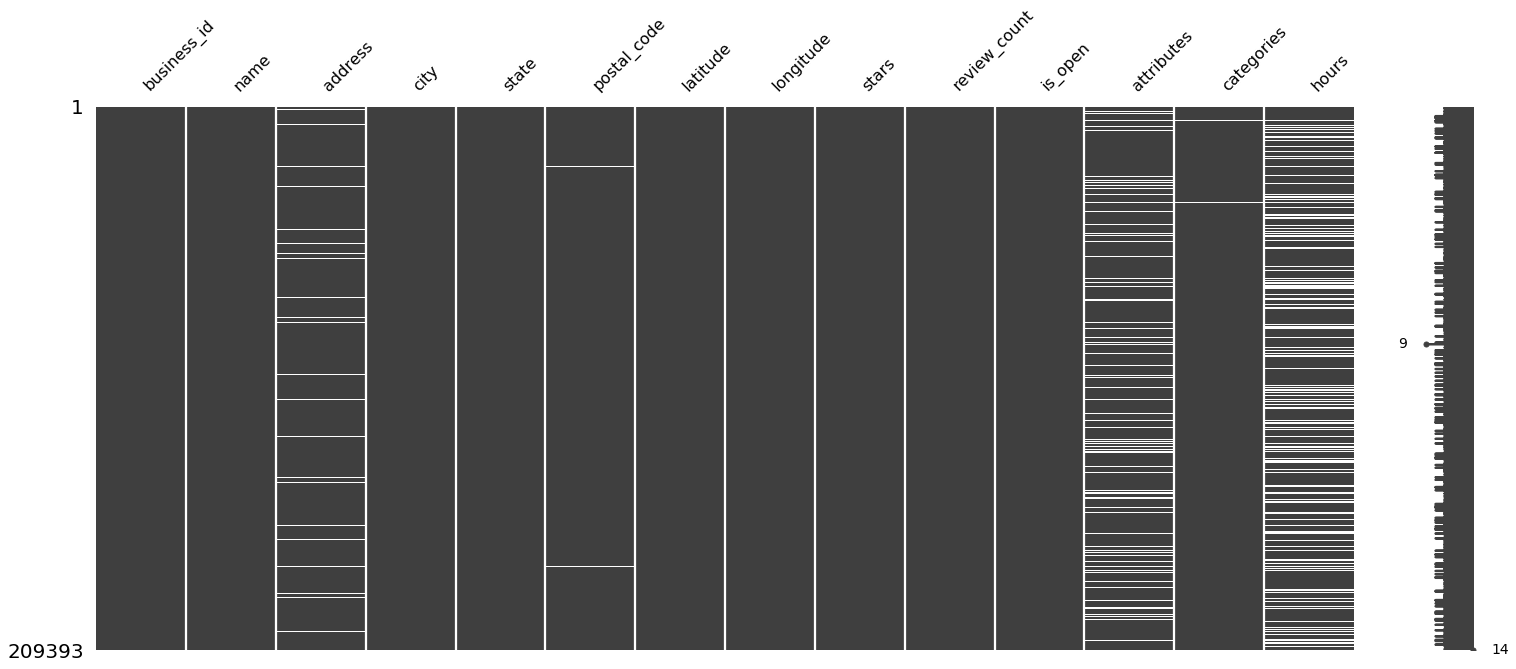

In [19]:
msno.matrix(business_df)

In [20]:
len(business_df.city.unique())

1251

In [21]:
sum(business_df.city.isna())

2

In [22]:
business_df.fillna('Null Value', inplace = True)

In [23]:
business_df.groupby('city')['name'].count()

city
110 Las Vegas         1
4321 W Flamingo Rd    1
ARSENAL               1
AZ                    1
Agincourt             2
                     ..
toronto               3
Ãle-Perrot           1
Ãle-des-Soeurs       1
âAvondale           1
âGilbert            1
Name: name, Length: 1251, dtype: int64

## Convert all string in the 'city' column to lower case for ease of handling and avoiding data inconsistency

In [24]:
business_df.city = business_df.city.str.lower()

In [25]:
business_df[business_df.city.str.contains('toronto')].city.unique()

array(['toronto', 'north toronto', 'toronto - front st (ot)',
       'toronto-etobicoke', 'toronto division', 'west toronto',
       'toronto-north york', 'toronto-west', 'downtown toronto',
       'toronto - danforth (ot)'], dtype=object)

In [26]:
len(business_df[business_df.city.str.contains('champaign|urbana')])

1753

In [27]:
len(business_df[business_df.city.str.contains('phoenix')])

20205

## Choose Phoenix and Toronto for further analysis to reduce the dataset we are dealing with:

In [28]:
yelp_business_df = business_df[business_df.city.str.contains('toronto|phoenix')].copy()
len(yelp_business_df)

40587

In [29]:
yelp_business_df.city.unique()

array(['toronto', 'phoenix', 'north toronto', 'toronto - front st (ot)',
       'phoenix ap', 'toronto-etobicoke', 'phoenix ', 'toronto division',
       'metro phoenix', 'phoenix, az', 'west toronto',
       'toronto-north york', 'toronto-west', 'phoenix metro area',
       'downtown toronto', 'north phoenix', 'phoenix valley',
       'toronto - danforth (ot)', 'phoenix,', 'phoenix az'], dtype=object)

## Data consistency for 'city':

In [30]:
yelp_business_df.city.replace(r'^.*toronto.*$', 'toronto', regex = True, inplace = True)
yelp_business_df.city.replace(r'^.*phoenix.*$', 'phoenix', regex=True, inplace = True)
yelp_business_df.city.unique()

array(['toronto', 'phoenix'], dtype=object)

In [31]:
yelp_business_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,toronto,ON,M5B 1R4,43.656542,-79.381308,4.0,9,1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Shopping, Shoe Stores, Fashion","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
28,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,16223 N Cave Creek Rd,phoenix,AZ,85032,33.633689,-112.030435,4.5,17,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Auto Repair","{'Monday': '7:30-17:0', 'Tuesday': '9:0-17:0',..."


# Sort the restaurants by stars:

In [32]:
yelp_restaurants_df = yelp_business_df[yelp_business_df.categories.str.contains('restaurants', case = False)]

### (1) Toronto:

In [57]:
toronto_restaurants_sorted = yelp_restaurants_df.query('city == "toronto"').sort_values(['stars', 'review_count'], ascending=False)
toronto_restaurants_sorted.head(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
39603,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,1,"{'BikeParking': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'..."
148903,J9vAdD2dCpFuGsxPIn184w,New Orleans Seafood & Steakhouse,267 Scarlett Road,toronto,ON,M6N 4L1,43.677744,-79.506248,5.0,122,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Steakhouses, Cajun/Creole, Restaurants, Seafood","{'Tuesday': '17:0-21:15', 'Wednesday': '17:0-2..."
23075,JB8-8TtNYX-vLqN7cz-zHA,Zeal Burgers,1926 Weston Road,toronto,ON,M9N 1W2,43.700356,-79.517524,5.0,103,1,"{'RestaurantsAttire': ""'casual'"", 'OutdoorSeat...","Restaurants, Burgers","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
410,VUADGMPLJoWqhHb1G4LIcA,Veghed,1199 Dundas Street W,toronto,ON,M6J 1X3,43.649166,-79.422498,5.0,71,1,"{'BusinessParking': ""{'garage': False, 'street...","Vegan, Restaurants, Vegetarian","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."


In [58]:
len(toronto_restaurants_sorted[toronto_restaurants_sorted.review_count >= 100].query('stars == 5.0'))

3

### There are just 3 restaurants in Toronto with a 5 star rating and over a 100 reviews on Yelp

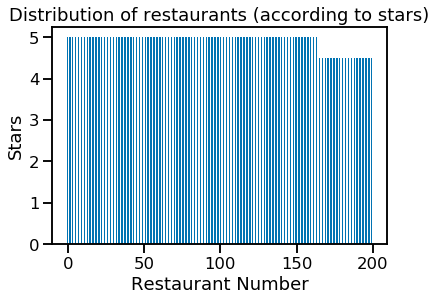

In [59]:
plt.bar(range(200), toronto_restaurants_sorted.stars[:200], width = 0.5)
plt.ylabel('Stars')
plt.xlabel('Restaurant Number')
plt.title('Distribution of restaurants (according to stars)')
plt.show()

### (2) Phoenix:

In [60]:
phoenix_restaurants_sorted = yelp_restaurants_df.query('city == "phoenix"').sort_values(['stars', 'review_count'], ascending=False)
phoenix_restaurants_sorted.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
141155,Xg5qEQiB-7L6kGJ5F4K3bQ,Little Miss BBQ,4301 E University Dr,phoenix,AZ,85034,33.421714,-111.989161,5.0,2329,1,"{'RestaurantsDelivery': 'False', 'RestaurantsA...","Barbeque, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
159659,9MVKjEMN5T59uzG1xoD2BQ,Cocina Madrigal,4044 S 16th St,phoenix,AZ,85040,33.408767,-112.047381,5.0,1107,1,"{'GoodForKids': 'True', 'WiFi': ""u'free'"", 'Re...","Restaurants, Mexican","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
24209,mss-LiOfL1vtoNo3WoEoJw,Kiss Pollos Estilo Sinaloa,306 W Yavapai St,phoenix,AZ,85003,33.436169,-112.077588,5.0,234,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Restaurants, Salad, American (New), Mexican, T...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."


In [61]:
len(phoenix_restaurants_sorted[phoenix_restaurants_sorted.review_count >= 100].query('stars == 5.0'))

17

### There are 17 restaurants in Phoenix with a 5 star rating and over a 100 reviews on Yelp

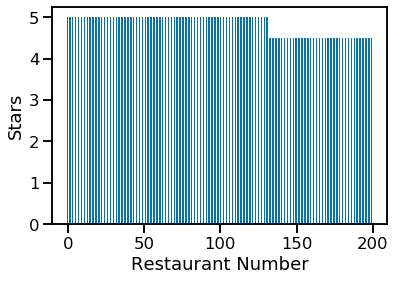

In [62]:
plt.bar(range(200), phoenix_restaurants_sorted.stars[:200], width = 0.5)
plt.ylabel('Stars')
plt.xlabel('Restaurant Number')
plt.show()

### (3) Champaign:

In [63]:
champaign_business_df = business_df[business_df.city.str.contains('urbana|champaign')].copy()
len(champaign_business_df)

1753

In [64]:
champaign_business_df.city.unique()

array(['champaign', 'urbana', 'urbana, illinois'], dtype=object)

### Data consistency for 'city':

In [65]:
champaign_business_df.city.replace(r'^.*champaign.*$', 'urbana-champaign', regex = True, inplace = True)
champaign_business_df.city.replace(r'^.*urbana.*$', 'urbana-champaign', regex=True, inplace = True)
champaign_business_df.city.unique()

array(['urbana-champaign'], dtype=object)

# Filter out the user-item dataframe for "urbana-champaign" city

In [66]:
champaign_user_item_df = pd.merge(champaign_business_df, review_df, how = 'inner', on = 'business_id')

In [67]:
len(champaign_user_item_df)

44457

In [72]:
champaign_user_item_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,urbana-champaign,IL,61820,40.110446,-88.233073,4.5,5,...,"Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",2TtLt9skrBwBM6QGEhFYCg,eSQ3z93DlzkpXK_H6MFEMw,5.0,0,0,0,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15
1,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,urbana-champaign,IL,61820,40.110446,-88.233073,4.5,5,...,"Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",G16jgK2n4QgEfAr4YIs0iA,5So3uZiWDmow4eG8Va0WhQ,5.0,0,0,0,I ordered feta cheese and spinach empanadas an...,2017-09-21 17:45:53


In [69]:
champaign_user_item_df.to_csv('Yelp_Dataset/champaign_user_item.csv')

# Filter out the user-item dataframe for "toronto" city

In [43]:
toronto_user_item_df = pd.merge(toronto_restaurants_sorted, review_df, how = 'inner', on = 'business_id')

In [44]:
len(toronto_user_item_df)

432514

In [45]:
toronto_user_item_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",SKBNW4QKNiclQ6mB2AQ8MQ,q3JSVBWICgXfO-zuLAp5fg,3.0,0,0,0,The customer service is on point. The food was...,2018-10-04 10:57:11
1,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",0dsaJN8eljlYRCqPWN1JCQ,0zW0RwIRwyJ6Qdirqvs5gA,5.0,0,0,0,The staff and workers are really friendly and ...,2017-04-30 13:40:40
2,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",aPUINDQsgifg_hSROs4TTA,eurxcv4blzrEs7-IgLGt5w,5.0,0,0,0,This is one great cafe. A little hard to find ...,2015-03-18 22:16:23
3,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",l8FlUGAgrAAOIi0fWV3Lgg,ZWpLKIbOC5xjuPWc7ZKe9Q,5.0,0,0,0,"Wonderful spaghetti, simple yet clean environm...",2018-09-03 18:13:28
4,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",N_twtO_6Wq5t2nbJ1048Bw,dN9MZp53PgIKA0LVo71GUA,5.0,0,0,0,Wonderful little cafe. Service was above and b...,2017-06-07 03:15:39


In [46]:
toronto_user_item_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [47]:
toronto_user_item_df.to_csv('Yelp_Dataset/toronto_user_item.csv')